<a href="https://colab.research.google.com/github/elizabethavargas/baseball/blob/main/barrel_causal_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Barrel-Home Run Causal Model

## DAG

**Variables**
*   **B:** Barrel
*   **HR:** Home Run
*   **LA:** Launch Angle
*   **LS:** Launch Speed
* **BA:** Batter Age
* **H:** Pitcher & Batter Handedness
* **T:** Temperature
* **A:** Altitude
* **W:** Weather
* **WS:** Wind Speed



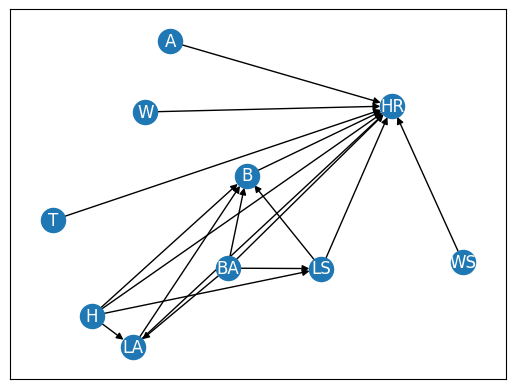

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.DiGraph()
graph.add_edges_from([("B", "HR"), ("LS", "B"), ("LA", "B"), ("LS", "HR"), ("LA", "HR"),
 ("H", "B"), ("H", "HR"), ("H", "LA"), ("H", "LS"), ("BA", "B"), ("BA", "HR"),
  ("BA", "LA"), ("BA", "LS"), ('T', "HR"), ('W', "HR"), ('A', "HR"), ('WS', "HR")])
nx.draw_networkx(graph, arrows=True, font_color="white")
#plt.tight_layout()

### Model

In [ ]:
df[['launch_speed', 'launch_angle', 'altitude', 'barrel', 'stand', 'age_bat', 'temperature', 'condition', 'wind_int']].isna().sum()

,0
launch_speed,0
launch_angle,0
altitude,0
barrel,0
stand,0
age_bat,0
temperature,0
condition,398
wind_int,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# fill na
df.condition = df.condition.fillna(0)

# drop na
df_model = df.dropna(subset=['launch_speed', 'launch_angle', 'altitude', 'barrel', 'stand', 'age_bat', 'temperature', 'condition', 'wind_int']).copy()

X = df_model[['launch_speed', 'launch_angle', 'altitude', 'barrel', 'stand', 'age_bat', 'temperature', 'condition', 'wind_int']]
y = df_model['home_run']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

df_model['predicted_hr_prob'] = model.predict_proba(scaler.transform(df_model[['launch_speed', 'launch_angle', 'altitude', 'barrel', 'stand', 'age_bat', 'temperature', 'condition', 'wind_int']]))[:, 1]
df_model

Accuracy: 0.9178878221323901
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96      7749
        True       0.20      0.95      0.33       167

    accuracy                           0.92      7916
   macro avg       0.60      0.93      0.64      7916
weighted avg       0.98      0.92      0.94      7916



,batter,stand,player_name,launch_speed,launch_angle,release_speed,age_bat,game_date,events,home_team,pitch_type,game_pk,home_run,altitude,temperature,condition,wind,wind_int,barrel,predicted_hr_prob
0,664983,0,"Varland, Gus",84.6,-23,95.0,27,2024-05-01,field_out,AZ,FF,747207,False,1100,88,3.0,"9 mph, L To R",9,False,0.000376
1,664983,0,"Varland, Gus",72.0,52,94.4,27,2024-05-01,NaN,AZ,FF,747207,False,1100,88,3.0,"9 mph, L To R",9,False,0.004537
2,571466,0,"Varland, Gus",73.3,-10,94.7,33,2024-05-01,field_out,AZ,FF,747207,False,1100,88,3.0,"9 mph, L To R",9,False,0.000049
3,677942,1,"Varland, Gus",73.5,-10,89.2,25,2024-05-01,NaN,AZ,SL,747207,False,1100,88,3.0,"9 mph, L To R",9,False,0.000039
4,682998,0,"Varland, Gus",98.5,12,89.0,24,2024-05-01,single,AZ,SL,747207,False,1100,88,3.0,"9 mph, L To R",9,False,0.194074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39575,682928,0,"Gonzales, Marco",97.6,-15,90.9,24,2024-04-01,field_out,WSH,SI,744875,False,10,53,4.0,"4 mph, In From RF",4,False,0.015831
39576,457705,1,"Gore, MacKenzie",76.7,58,97.7,38,2024-04-01,NaN,WSH,FF,744875,False,10,53,4.0,"4 mph, In From RF",4,False,0.011983
39577,668804,1,"Gore, MacKenzie",90.5,14,96.9,29,2024-04-01,single,WSH,FF,744875,False,10,53,4.0,"4 mph, In From RF",4,False,0.016147
39578,656582,1,"Gore, MacKenzie",80.9,67,97.2,32,2024-04-01,field_out,WSH,FF,744875,False,10,53,4.0,"4 mph, In From RF",4,False,0.072350


Confusion Matrix:


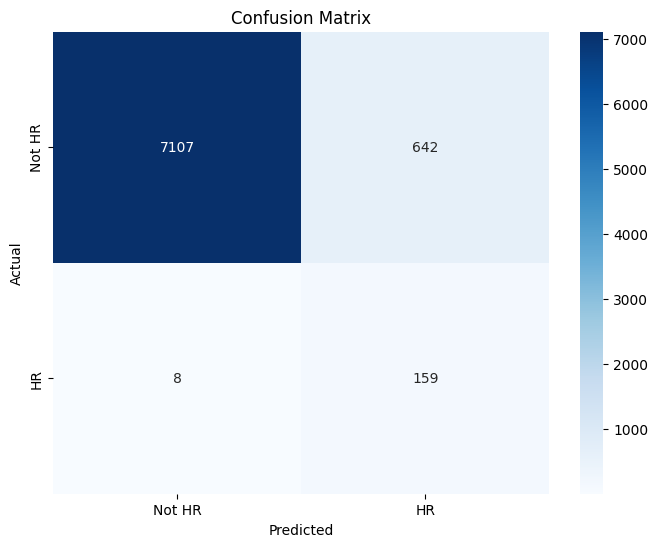


Feature Importance (Coefficients):


,Feature,Coefficient
0,launch_speed,4.075093
1,launch_angle,2.552122
3,barrel,0.479916
8,wind_int,0.093239
6,temperature,0.044350
2,altitude,0.038408
5,age_bat,-0.022559
7,condition,-0.130753
4,stand,-0.157215


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Display the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not HR', 'HR'], yticklabels=['Not HR', 'HR'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display Feature Importance (Coefficients)
print("\nFeature Importance (Coefficients):")
# Create a DataFrame to display coefficients with feature names
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
display(feature_importance.sort_values(by='Coefficient', ascending=False))

## Game info Dataset

In [ ]:
import pandas as pd

In [ ]:
game = pd.read_csv('gameinfo.csv')
game

/tmp/ipython-input-1638284916.py:1: DtypeWarning: Columns (10,11,13,17,19,21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  game = pd.read_csv('gameinfo.csv')


,gid,visteam,hometeam,site,date,number,starttime,daynight,innings,tiebreaker,...,vruns,hruns,wteam,lteam,line,batteries,lineups,box,pbp,season
0,LS3189904140,CHN,LS3,LOU03,18990414,0.0,0:00PM,day,NaN,NaN,...,15,1,CHN,LS3,y,both,y,y,NaN,1899
1,PHI189904140,WSN,PHI,PHI09,18990414,0.0,0:00PM,day,NaN,NaN,...,5,6,PHI,WSN,y,both,y,y,NaN,1899
2,BLN189904150,NY1,BLN,BAL07,18990415,0.0,0:00PM,day,NaN,NaN,...,3,5,BLN,NY1,y,both,y,y,NaN,1899
3,BRO189904150,BSN,BRO,NYC12,18990415,0.0,0:00PM,day,NaN,NaN,...,1,0,BSN,BRO,y,both,y,y,NaN,1899
4,CIN189904150,PIT,CIN,CIN05,18990415,0.0,0:00PM,day,NaN,NaN,...,5,2,PIT,CIN,y,both,y,y,NaN,1899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221168,LAN202410250,NYA,LAN,LOS03,20241025,0.0,5:08PM,night,9.0,NaN,...,3,6,LAN,NYA,y,both,y,y,y,2024
221169,LAN202410260,NYA,LAN,LOS03,20241026,0.0,5:08PM,night,9.0,NaN,...,2,4,LAN,NYA,y,both,y,y,y,2024
221170,NYA202410280,LAN,NYA,NYC21,20241028,0.0,8:08PM,night,9.0,NaN,...,4,2,LAN,NYA,y,both,y,y,y,2024
221171,NYA202410290,LAN,NYA,NYC21,20241029,0.0,8:08PM,night,9.0,NaN,...,4,11,NYA,LAN,y,both,y,y,y,2024
